# Exercises Sheet 2 Introduction to Machine Learning

# Exercicio 1

In [22]:
import numpy as np
# Exercise 1.1
print ("Using operator AND")

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

d = np.array([0, 0, 0, 1])

# Display input, expected output (d), and perceptron output
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]}")

Using operator AND
Input: [0 0] | Target: 0
Input: [0 1] | Target: 0
Input: [1 0] | Target: 0
Input: [1 1] | Target: 1


In [23]:
# Exercise 1.2
# Initialize w0, w1, and w2 to small random values
# np.random.seed(9)  # For reproducibility
w0 = np.random.rand()
print (f"w0 (bias) is {w0}")
w1 = np.random.rand()
print (f"w1 is {w1}")
w2 = np.random.rand()
print (f"w2 is {w2}")

# Activation function f(s)#
def activation(s):
    return 1 if s > 0.5 else 0

# Calculate outputs for each input pattern
o = []
for x1, x2 in X:
    s = w0 + w1 * x1 + w2 * x2
    o.append(activation(s))
    #o.append(s)

o = np.array(o)
print(f"Output vector o: {o}")


w0 (bias) is 0.9807496022085954
w1 is 0.6037485036407434
w2 is 0.3046699543936294
Output vector o: [1 1 1 1]


In [24]:
# Exercise 1.3
# Calculate the error e = d - o
e = d - o

# Display input, expected output (d), perceptron output (o), and the difference (error e)
for i in range(len(X)):
    print(f"Input: {X[i]} | Target: {d[i]} | Output: {o[i]} | Error: {e[i]}")


Input: [0 0] | Target: 0 | Output: 1 | Error: -1
Input: [0 1] | Target: 0 | Output: 1 | Error: -1
Input: [1 0] | Target: 0 | Output: 1 | Error: -1
Input: [1 1] | Target: 1 | Output: 1 | Error: 0


In [25]:
# Learning rate
alpha = 1e-4

# Initialize update terms for w0, w1, and w2
delta_w0 = 0
delta_w1 = 0
delta_w2 = 0

# Update each weight based on the error for each input pattern
for i in range(len(X)):
    x1, x2 = X[i]
    delta_w0 += alpha * e[i]
    delta_w1 += alpha * x1 * e[i]
    delta_w2 += alpha * x2 * e[i]

# Display the update terms
print(f"∆w0: {delta_w0}")
print(f"∆w1: {delta_w1}")
print(f"∆w2: {delta_w2}")


∆w0: -0.00030000000000000003
∆w1: -0.0001
∆w2: -0.0001


  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 1 | w0: 0.0006, w1: 0.8335, w2: 0.7492 | Total Error: 2
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 2 | w0: -0.0014, w1: 0.8325, w2: 0.7482 | Total Error: 2
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 3 | w0: -0.0034, w1: 0.8315, w2: 0.7472 | Total Error: 2
  Input: [0 0], Target: 0, Output: 0, Error: 0
  Input: [0 1], Target: 0, Output: 1, Error: -1
  Input: [1 0], Target: 0, Output: 1, Error: -1
  Input: [1 1], Target: 1, Output: 1, Error: 0
End of Epoch 4 | w0: -0.0054, w

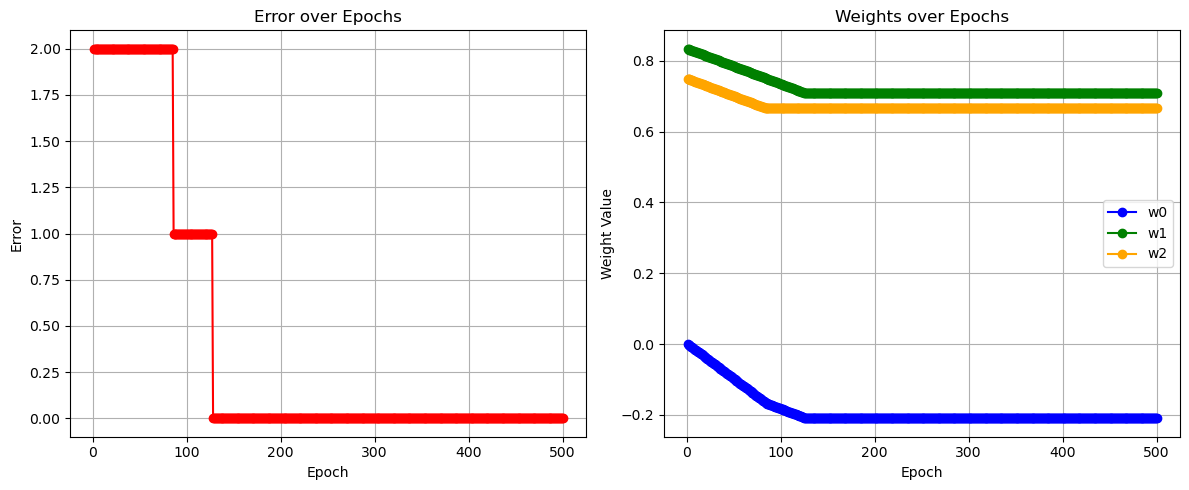

In [26]:
import matplotlib.pyplot as plt

optimal_found = False
optimal_epoch = None

# Training parameters
alpha = 10e-4  # Learning rate
epochs = 500  # Number of epochs

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Lists to store values for plotting
errors = []
weights_w0 = []
weights_w1 = []
weights_w2 = []

w0 = np.random.rand()
w1 = np.random.rand()
w2 = np.random.rand()

# Training loop over epochs
for epoch in range(epochs):
    # Initialize update terms for each epoch
    delta_w0 = 0
    delta_w1 = 0
    delta_w2 = 0

    # Track cumulative error for the epoch
    epoch_error = 0

    # Process each input pattern
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = d[i] - o
        epoch_error += abs(e)  # Summing absolute error for tracking

        # Update terms for weights
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e
        print(f"  Input: {X[i]}, Target: {d[i]}, Output: {o}, Error: {e}")

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and cumulative error after each epoch
    print(f"End of Epoch {epoch + 1} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")

    if not optimal_found and epoch_error==0:
        optimal_found = True
        print(f"The optimal solution was found on epoch {epoch + 1}!")
        optimal_epoch = epoch + 1


    # Store values for plotting
    errors.append(epoch_error)
    weights_w0.append(w0)
    weights_w1.append(w1)
    weights_w2.append(w2)

print(f"The optimal solution was found on epoch {optimal_epoch}!")

# Plotting results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Error over epochs
ax1.plot(range(1, epochs + 1), errors, marker='o', color='r')
ax1.set_title("Error over Epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Error")
ax1.grid(True)

# Plot 2: Weight values over epochs
ax2.plot(range(1, epochs + 1), weights_w0, marker='o', label="w0", color='b')
ax2.plot(range(1, epochs + 1), weights_w1, marker='o', label="w1", color='g')
ax2.plot(range(1, epochs + 1), weights_w2, marker='o', label="w2", color='orange')
ax2.set_title("Weights over Epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Weight Value")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Exercicio 1.7

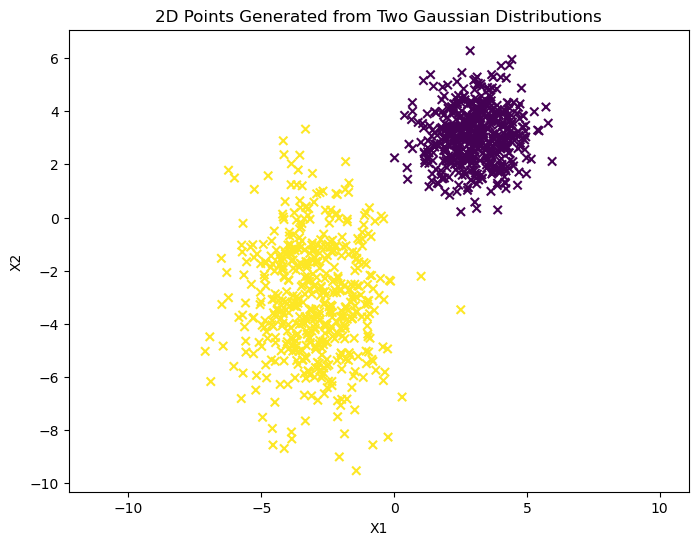

Dataset saved to 'my_data.csv'


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

num_points = 500

# Generate points for class 'a'
mean_a = [3, 3]
cov_a = [[1, 0], [0, 1]]
a = np.random.multivariate_normal(mean_a, cov_a, num_points)
label_a = np.zeros((num_points, 1))  # Column of zeros for the first dataset
a = np.hstack((a, label_a))  # Combine points with labels

# Generate points for class 'b'
mean_b = [-3, -3]
cov_b = [[2, 0], [0, 5]]
b = np.random.multivariate_normal(mean_b, cov_b, num_points) # .T #TODO ?
label_b = np.ones((num_points, 1))  # Column of ones for the second dataset
b = np.hstack((b, label_b))  # Combine points with labels

# Join and shuffle the dataset
dataset = np.vstack((a, b))
np.random.shuffle(dataset)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='viridis', marker='x')
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Points Generated from Two Gaussian Distributions')
plt.show()

# Save the dataset to a CSV file
df = pd.DataFrame(dataset, columns=['X1', 'X2', 'Label'])
df.to_csv("generated_dataset.csv", index=False)
print("Dataset saved to 'my_data.csv'")



In [28]:
import numpy as np
import pandas as pd

# Load the generated dataset
data = pd.read_csv("generated_dataset.csv").values
X = data[:, :2]  # Features (first two columns)
y = data[:, 2]   # Labels (third column)

# Perceptron parameters
alpha = 1e-2  # Learning rate
epochs = 50   # Number of epochs (adjustable for faster convergence)

# Initialize weights randomly between 0 and 1
w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()

# Activation function
def activation(s):
    return 1 if s > 0.5 else 0

# Training loop
for epoch in range(epochs):
    # Initialize update terms
    delta_w0, delta_w1, delta_w2 = 0, 0, 0
    epoch_error = 0  # Track total error

    # Iterate over all data points
    for i in range(len(X)):
        x1, x2 = X[i]
        
        # Calculate output
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)

        # Calculate error
        e = y[i] - o
        epoch_error += abs(e)  # Accumulate absolute error for the epoch

        # Update weight terms based on error
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e

    # Update weights at the end of each epoch
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # Print weights and error after each epoch
    print(f"Epoch {epoch + 1}/{epochs} | w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f} | Total Error: {epoch_error}")


Epoch 1/50 | w0: 0.7020, w1: -29.7570, w2: -30.3516 | Total Error: 998.0
Epoch 2/50 | w0: 0.7220, w1: -29.8086, w2: -30.2973 | Total Error: 2.0
Epoch 3/50 | w0: 0.7420, w1: -29.8602, w2: -30.2430 | Total Error: 2.0
Epoch 4/50 | w0: 0.7620, w1: -29.9118, w2: -30.1887 | Total Error: 2.0
Epoch 5/50 | w0: 0.7820, w1: -29.9634, w2: -30.1344 | Total Error: 2.0
Epoch 6/50 | w0: 0.8020, w1: -30.0150, w2: -30.0801 | Total Error: 2.0
Epoch 7/50 | w0: 0.8120, w1: -30.0332, w2: -30.0590 | Total Error: 1.0
Epoch 8/50 | w0: 0.8220, w1: -30.0515, w2: -30.0380 | Total Error: 1.0
Epoch 9/50 | w0: 0.8320, w1: -30.0698, w2: -30.0170 | Total Error: 1.0
Epoch 10/50 | w0: 0.8420, w1: -30.0880, w2: -29.9959 | Total Error: 1.0
Epoch 11/50 | w0: 0.8520, w1: -30.1063, w2: -29.9749 | Total Error: 1.0
Epoch 12/50 | w0: 0.8620, w1: -30.1245, w2: -29.9539 | Total Error: 1.0
Epoch 13/50 | w0: 0.8720, w1: -30.1428, w2: -29.9328 | Total Error: 1.0
Epoch 14/50 | w0: 0.8820, w1: -30.1610, w2: -29.9118 | Total Error: 1.0

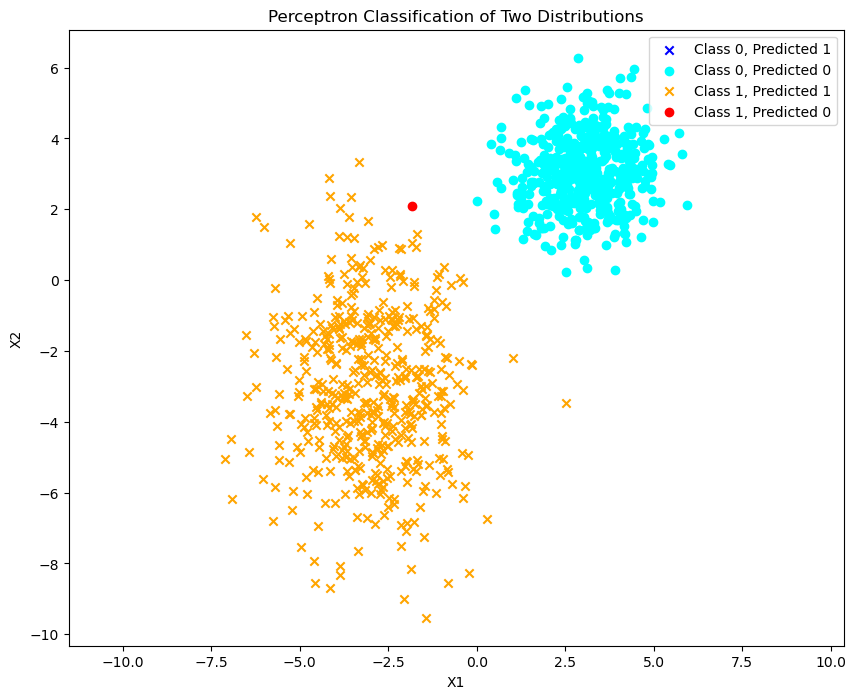

In [29]:
# Exercise 1.8
import matplotlib.pyplot as plt

# Predict labels using the trained perceptron
predicted_labels = []
for i in range(len(X)):
    x1, x2 = X[i]
    s = w0 + w1 * x1 + w2 * x2
    o = activation(s)
    predicted_labels.append(o)

predicted_labels = np.array(predicted_labels)

# Separate points based on true and predicted labels
a1 = X[(y == 0) & (predicted_labels == 1)]  # (a) First distribution, labeled 1
a0 = X[(y == 0) & (predicted_labels == 0)]  # (b) First distribution, labeled 0
b1 = X[(y == 1) & (predicted_labels == 1)]  # (c) Second distribution, labeled 1
b0 = X[(y == 1) & (predicted_labels == 0)]  # (d) Second distribution, labeled 0

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(a1[:, 0], a1[:, 1], color='blue', marker='x', label='Class 0, Predicted 1')
plt.scatter(a0[:, 0], a0[:, 1], color='cyan', marker='o', label='Class 0, Predicted 0')
plt.scatter(b1[:, 0], b1[:, 1], color='orange', marker='x', label='Class 1, Predicted 1')
plt.scatter(b0[:, 0], b0[:, 1], color='red', marker='o', label='Class 1, Predicted 0')

# Set plot parameters
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.title('Perceptron Classification of Two Distributions')
plt.show()


In [30]:
# Ex 1.9
# Corrected confusion matrix calculation
def compute_confusion_matrix(y_true, y_pred):
    # Identify unique class labels and map them to integer indices
    classes = np.unique(y_true)
    class_to_index = {label: idx for idx, label in enumerate(classes)}
    
    # Initialize matrix of zeros with shape based on number of unique classes
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    # Fill the matrix by counting occurrences of (true, pred) label pairs
    for true, pred in zip(y_true, y_pred):
        matrix[class_to_index[true], class_to_index[pred]] += 1
    
    return matrix

# Calculate the confusion matrix
cm = compute_confusion_matrix(y, predicted_labels)

# Add labels to the matrix for display purposes
cm_with_labels = np.vstack([
    ["", "Predicted 0:", "Predicted 1:"],
    ["Actual 0:", *cm[0]],
    ["Actual 1:", *cm[1]]
])

print("Confusion Matrix:")
for row in cm_with_labels:
    print(row)

Confusion Matrix:
['' 'Predicted 0:' 'Predicted 1:']
['Actual 0:' '500' '0']
['Actual 1:' '1' '499']


In [31]:
n_tests = 30
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}


def calculate_metrics(tn, tp, fp, fn, predicted_labels):
    accuracy = (tp + tn) / len(predicted_labels) if len(predicted_labels) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

# Run metric calculation for each test
for _ in range(n_tests):
    # Initialize weights randomly
    w0, w1, w2 = np.random.rand(), np.random.rand(), np.random.rand()
    

    # Training loop
    for epoch in range(epochs):
        # Initialize update terms
        delta_w0, delta_w1, delta_w2 = 0, 0, 0
        epoch_error = 0  # Track total error

        # Iterate over all data points
        for i in range(len(X)):
            x1, x2 = X[i]
            
            # Calculate output
            s = w0 + w1 * x1 + w2 * x2
            o = activation(s)

            # Calculate error
            e = y[i] - o
            epoch_error += abs(e)  # Accumulate absolute error for the epoch

            # Update weight terms based on error
            delta_w0 += alpha * e
            delta_w1 += alpha * x1 * e
            delta_w2 += alpha * x2 * e

        # Update weights at the end of each epoch
        w0 += delta_w0
        w1 += delta_w1
        w2 += delta_w2

    # Predict labels using the trained perceptron
    predicted_labels = []
    for i in range(len(X)):
        x1, x2 = X[i]
        s = w0 + w1 * x1 + w2 * x2
        o = activation(s)
        predicted_labels.append(o)

    predicted_labels = np.array(predicted_labels)

    # Separate points based on true and predicted labels
    a1 = X[(y == 0) & (predicted_labels == 1)]  # (a) First distribution, labeled 1
    a0 = X[(y == 0) & (predicted_labels == 0)]  # (b) First distribution, labeled 0
    b1 = X[(y == 1) & (predicted_labels == 1)]  # (c) Second distribution, labeled 1
    b0 = X[(y == 1) & (predicted_labels == 0)]  # (d) Second distribution, labeled 0


    tn = len(a0)
    tp = len(b1)
    fp = len(a1)
    fn = len(b0)

    #print(len(a0))
    #print(len(a1))
    #print(len(b1))
    #print(len(b0))

    # Train the perceptron with new weights here (adjust this code to your training loop)
    # e.g., train_perceptron(X, y, w0, w1, w2)

    # Predict labels after training
    predicted_labels = np.array([activation(w0 + w1 * x[0] + w2 * x[1]) for x in X])
    
    # Calculate metrics for current test
    accuracy, precision, recall, f1 = calculate_metrics(tn, tp, fp, fn, predicted_labels)
    
    #print(accuracy, precision, recall, f1)

    # Append current test metrics to the lists
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# Calculate and print average metrics across all tests
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
print(f"Average Metrics over {n_tests} Tests:")
print(f"Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): \n {avg_metrics['accuracy']:.4f}")
print(f"Precision ratio of true positive predictions to all positive predictions (true positives + false positives): \n {avg_metrics['precision']:.4f}")
print(f"Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): \n {avg_metrics['recall']:.4f}")
print(f"F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): \n {avg_metrics['f1']:.4f}")


Average Metrics over 30 Tests:
Accuracy (ratio of correct predictions (both true positives and true negatives) to total predictions): 
 0.9990
Precision ratio of true positive predictions to all positive predictions (true positives + false positives): 
 1.0000
Recall (ratio of true positive predictions to all actual positives (true positives + false negatives)): 
 0.9980
F1 Score (the harmonic mean of precision and recall, a single metric balancing the two): 
 0.9990


# Ex 2

In [32]:
import numpy as np
import pandas as pd
import math

data = pd.read_csv("./irisData/bezdekIris.data").values
# print(data)

def split_data_random(data, split_ratio=0.7):
    # Shuffle the data
    np.random.shuffle(data)
    
    # Calculate the split index
    split_index = int(len(data) * split_ratio)
    
    # Split the data into training and testing sets
    treino = data[:split_index]
    teste = data[split_index:]

    return treino, teste


def classificador(mais_proximos):
    """
    Returns the majority label given a list of closes neighbors from training data set
    """
    label_counts = {}
    for label in mais_proximos:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    majority_label = max(label_counts, key=label_counts.get)
    return majority_label


def knn(plant, treino, k = 3):
    # k should be odd to prevent race between two labels
    closer_data_points = mais_proximos(plant, treino, k)
    class_prevista = classificador(closer_data_points)
    return class_prevista


def mais_proximos(plant, treino, k=3):
    distances = []
    
    for example in treino:
        # Calculate Euclidean distance between `plant` and `example`
        distance = math.sqrt(sum((plant[i] - example[i]) ** 2 for i in range(len(plant) - 1)))
        distances.append((distance, example[-1]))  # Store the distance and label

    # Sort distances and select the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = [label for _, label in distances[:k]]
    
    return nearest_neighbors

# Function to calculate accuracy
def test_accuracy(teste, treino, k=3):
    correct = 0
    total = len(teste)
    for plant in teste:
        true_label = plant[-1] # last element is label
        predicted_label = knn(plant, treino, k)
        if predicted_label == true_label:
            correct += 1
    accuracy = (correct / total) * 100
    return accuracy

In [33]:
# Calculate the number of correct predictions k = 3

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=3)

95.55555555555556

In [34]:
# Calculate the number of correct predictions k = 7

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=7)

88.88888888888889

In [35]:
# Calculate the number of correct predictions k = 11

train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
test_accuracy(test_data_set, train_data_set, k=11)

97.77777777777777

{3: [95.55555555555556, 93.33333333333333, 95.55555555555556, 97.77777777777777, 93.33333333333333, 97.77777777777777, 97.77777777777777, 97.77777777777777, 100.0, 93.33333333333333, 95.55555555555556, 97.77777777777777, 93.33333333333333, 93.33333333333333, 97.77777777777777, 97.77777777777777, 95.55555555555556, 93.33333333333333, 97.77777777777777, 100.0, 97.77777777777777, 93.33333333333333, 97.77777777777777, 95.55555555555556, 95.55555555555556, 95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 95.55555555555556], 7: [100.0, 97.77777777777777, 91.11111111111111, 97.77777777777777, 95.55555555555556, 95.55555555555556, 93.33333333333333, 100.0, 95.55555555555556, 97.77777777777777, 95.55555555555556, 95.55555555555556, 95.55555555555556, 95.55555555555556, 95.55555555555556, 95.55555555555556, 100.0, 95.55555555555556, 93.33333333333333, 95.55555555555556, 91.11111111111111, 95.55555555555556, 95.55555555555556, 95.55555555555556, 97.77777777777777, 93.33

/tmp/ipykernel_5834/1361258765.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=k_values)


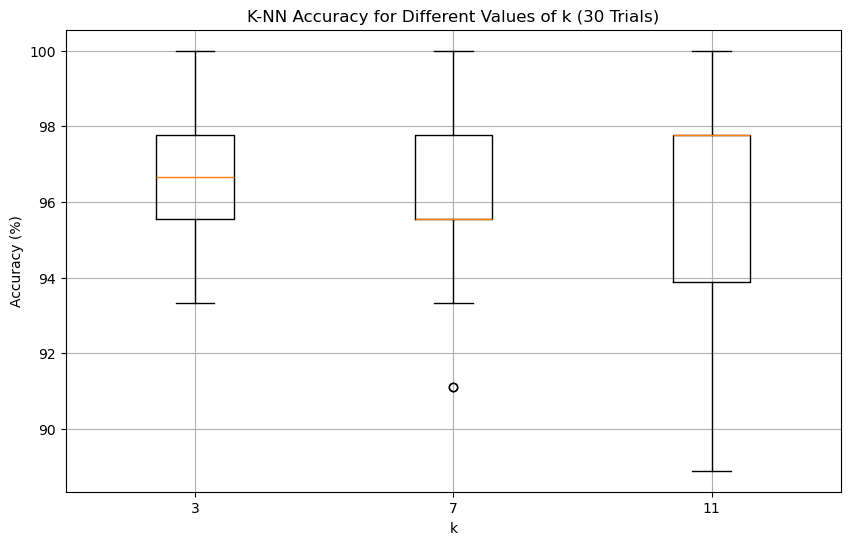

In [36]:
# Experiment parameters
k_values = [3, 7, 11]
repetitions = 30
results = {k: [] for k in k_values}

# Run experiment
for k in k_values:
    for _ in range(repetitions):
        train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)
        accuracy = test_accuracy(test_data_set, train_data_set, k)
        results[k].append(accuracy)

print(results)

# Plot results
plt.figure(figsize=(10, 6))
plt.boxplot([results[k] for k in k_values], labels=k_values)
plt.title('K-NN Accuracy for Different Values of k (30 Trials)')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

**Boxplot**: 
- We draw a box from the first quartile to the third quartile. 
- A vertical line goes through the box at the median
- A leg goes down to the minimum and a leg goes up to the maximum values.
- Circles outside the whiskers are outliers in the data

In [37]:
# Ex 2.2 Confusion Matrix
import matplotlib.pyplot as plt

def compute_predictions(teste, treino, k=3):
    """
    Returns the true and predicted labels for the test set.
    """
    true_labels = []
    predicted_labels = []

    for plant in teste:
        true_label = plant[-1]
        predicted_label = knn(plant, treino, k)
        
        true_labels.append(true_label)
        predicted_labels.append(predicted_label)
    
    return true_labels, predicted_labels

def compute_confusion_matrix(true_labels, predicted_labels):
    # Identify unique classes and create a mapping from class names to indices
    classes = sorted(list(set(true_labels)))
    n_classes = len(classes)
    class_to_index = {cls: i for i, cls in enumerate(classes)}
    
    # Initialize confusion matrix
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    
    # Populate confusion matrix
    for true_label, pred_label in zip(true_labels, predicted_labels):
        true_idx = class_to_index[true_label]
        pred_idx = class_to_index[pred_label]
        confusion_matrix[true_idx, pred_idx] += 1
    
    # Format matrix with labels
    formatted_matrix = [[""] + [f"Predicted {cls}:" for cls in classes]]
    for i, cls in enumerate(classes):
        formatted_matrix.append([f"Actual {cls}:"] + list(confusion_matrix[i]))
    
    return formatted_matrix

# Set k and split data
k = 3  # Ensure k is the same for both accuracy and confusion matrix calculations
train_data_set, test_data_set = split_data_random(data, split_ratio=0.7)

# Calculate and print test accuracy
accuracy = test_accuracy(test_data_set, train_data_set, k)
print(f"Test Accuracy: {accuracy:.2f}%")

# Compute true and predicted labels for confusion matrix
true_labels, predicted_labels = compute_predictions(test_data_set, train_data_set, k)

print(f"True labels: {true_labels}")
print(f"Predicted labels: {predicted_labels}")

cm = compute_confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
for row in cm:
    print(row)


Test Accuracy: 100.00%
True labels: ['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']
Predicted labels: ['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versico

Confusion matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


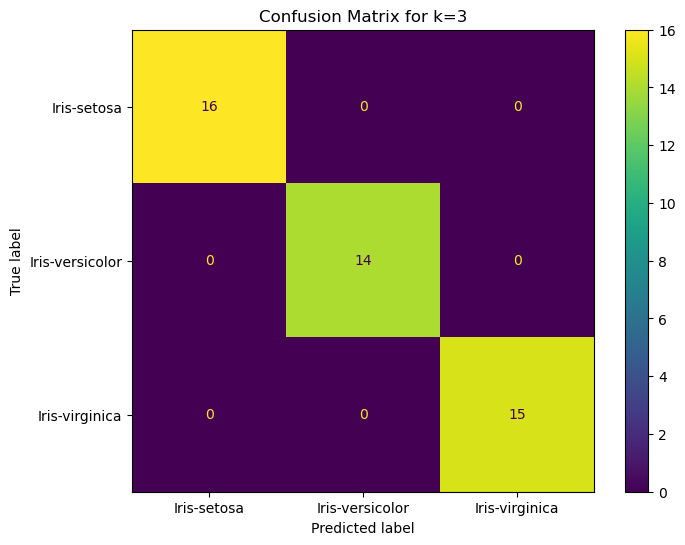

In [38]:
# With sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(data[:, -1]))
print("Confusion matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(data[:, -1]))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title(f'Confusion Matrix for k={k}')
plt.show()

### Ex 2.3

K should always be an odd number to prevent race conditions like the case where there are the same number of neighbors from two different classes.

# Exercicio 3

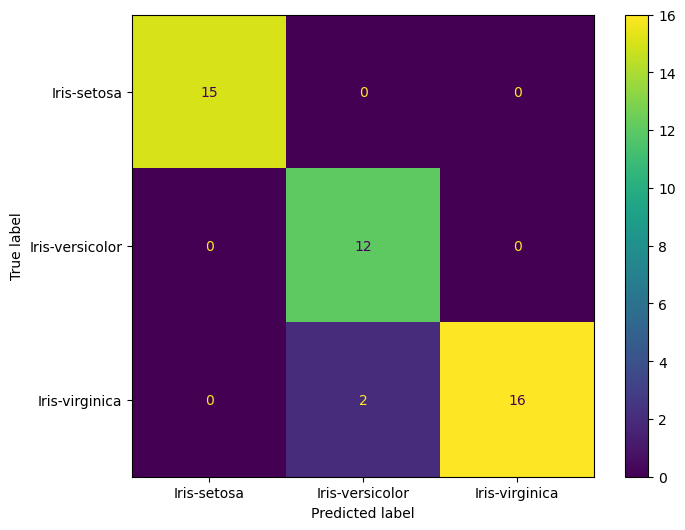

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dados= pd.read_csv('./irisData/bezdekIris.data').values

# Classification:
# 0 - low 
# 1 - medium
# 2 - high

# How we calssify
# 4.3 - 7.9 __ 1.2
# 2.0 - 4.4 __ 0.73
# 1.0 - 6.9 __ 1.967
# 0.1 - 2.5 __ 0.8

a = 0
for i in dados: # classify each value of each collum as low medium or high
    if i[0] >= 4.3 and i[0] < 5.5: # low
        dados[a][0] = 0
    elif i[0] >= 5.5 and i[0] < 6.7: # medium
        dados[a][0] = 1 
    else: # high
        dados[a][0] = 2
    
    if i[1] >= 2.0 and i[1] < 2.73: # low
        dados[a][1] = 0
    elif i[1] >= 2.73 and i[1] < 3.46: # medium
        dados[a][1] = 1
    else: # high
        dados[a][1] = 2
    
    if i[2] >= 1.0 and i[2] < 2.967: # low
        dados[a][2] = 0
    elif i[2] >= 2.967 and i[2] < 4.934: # medium
        dados[a][2] = 1
    else: # high
        dados[a][2] = 2
    
    if i[3] >= 0.1 and i[0] < 0.9: # low
        dados[a][3] = 0
    elif i[3] >= 0.9 and i[3] < 1.7: # medium
        dados[a][3] = 1
    else: # high
        dados[a][3] = 2
    
    a +=1

np.random.shuffle(dados)

# separate de data into training and testing sets
treino = dados[:104]
teste = dados[104:]

# function to calculate P(Class) for each class in the dataset
def calc_probs2(dados):
    prob_classe = [0.0,0.0,0.0] # IS, IVE, IVI # P(Class) for setosa, versicolor, verginica
    dados0 = [[]] # IS # Setosa values
    dados1 = [[]] # IVE # Versicolor values
    dados2 = [[]] # IVI # Virginica values

    for i in dados:
        if i[4] == "Iris-setosa":
            prob_classe[0] += 1
            dados0.append(i)
        elif i[4] == "Iris-versicolor":
            prob_classe[1] += 1
            dados1.append(i)
        else:
            prob_classe[2] += 1
            dados2.append(i)

    dados0.pop(0)
    dados1.pop(0)
    dados2.pop(0)

    dados0 = np.array(dados0)
    dados1 = np.array(dados1)
    dados2 = np.array(dados2)

    dadosT = np.array([dados0, dados1, dados2], dtype=object) # gather all transformed data

    prob_classe[0] = prob_classe[0]/len(dados)
    prob_classe[1] = prob_classe[1]/len(dados)
    prob_classe[2] = prob_classe[2]/len(dados)

    return dadosT, prob_classe # returns data and P(Class)

# function to calculate P(X|Class) for each plant (X) and each Class
def calc_probs(dadosT,prob_classe,planta):
    probs_finais = [0,0,0] # final P(X|Class) for each plant
    for j in range(len(dadosT)):
        conta = [0,0,0,0]
        for i in dadosT[j]:
            if i[0]==planta[0]:
                conta[0]+=1
            if i[1]==planta[1]:
                conta[1]+=1
            if i[2]==planta[2]:
                conta[2]+=1
            if i[3]==planta[3]:
                conta[3]+=1
        conta = [conta[0]/len(dadosT[j]),conta[1]/len(dadosT[j]),conta[2]/len(dadosT[j]),conta[3]/len(dadosT[j])]
        probs_finais[j] = conta[0] * conta[1] * conta[2] * conta[3] * prob_classe[j]

    return probs_finais

dadostodos, probsssss_class = calc_probs2(treino)

valores_corretos = []
valores_previstos = []

# calculate true positives,negatives for confusion matrix
for i in teste:
    ok = calc_probs(dadostodos,probsssss_class,i)
    if ok[0] > ok[1] and ok[0] > ok[2]:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-setosa")
    elif ok[1] > ok[0] and ok[1] > ok[2]:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-versicolor")
    else:
        valores_corretos.append(i[4])
        valores_previstos.append("Iris-virginica")

# draw confusion matrix
cm = confusion_matrix(valores_corretos, valores_previstos, labels=np.unique(dados[:, -1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(dados[:, -1]))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.show()

## Ex 4.1

Calculate the Entropy (Measure of disorder in the dataset, heigher entropy means the dataset has a bigger mixture of classes)

General formula for entropy:
$$
H(S) = -\sum_{i=1}^{n} p(i) \log_2 p(i)
$$
We are using binary classification, just for *Iris-setosa* right now, so $(p+)$ is the probability on the dataset of being an *Iris-setosa* and $(p-)$ the probability of not being an *Iris-setosa*. So the calculation will be:
$$
 \text{entropy}(S) = - (p+) \cdot \log_2(p+) - (p-) \cdot \log_2(p-) 
$$

Creating 3 more databses, one with the low elements of the first column, one with the medium and one with the high.

In [40]:
import numpy as np
from collections import Counter
import math

# Part 1: Splitting the dataset based on the first column
low_dataset = [row for row in dados if row[0] == 0] # has all the elements with value low in the first column
medium_dataset = [row for row in dados if row[0] == 1] # has all the elements with value medium in the first column
high_dataset = [row for row in dados if row[0] == 2] # has all the elements with value high in the first column

In [41]:
# Calculate the Entropy
def entropy(data,tipo):
    dadosT, prob_classe = calc_probs2(data)
    if(tipo == 0): # setosa
        p_plus = prob_classe[0]
        p_minus = prob_classe[1] + prob_classe[2]
    elif(tipo == 1): # virticolor
        p_plus = prob_classe[1]
        p_minus = prob_classe[0] + prob_classe[2]
    else: # virginica
        p_plus = prob_classe[2]
        p_minus = prob_classe[1] + prob_classe[0]
        
    # if the classes are all the same, there is no variation, no entropy
    if p_minus == 0:
        return 0 
    if p_plus == 0:
        return 0

    entropy = -p_plus * math.log2(p_plus) - p_minus * math.log2(p_minus)
    return entropy

# Print entropies
print("Complete dataset entropy:", entropy(dados, 0))
print("Low dataset entropy:", entropy(low_dataset, 0))
print("Medium dataset entropy:", entropy(medium_dataset, 0))
print("High dataset entropy:", entropy(high_dataset, 0))

# Entropy with all classes
def calculate_entropy_full(data):
    """Calculate the entropy of a dataset."""
    label_counts = Counter(row[-1] for row in data)
    total = len(data)
    entropy = 0.0
    for count in label_counts.values():
        probability = count / total
        entropy -= probability * math.log2(probability)
    return entropy

'''
def calculate_entropy(data):
    """Calculate the entropy of a dataset."""
    label_counts = Counter(row[-1] for row in data)
    total = len(data)
    entropy = 0.0
    for count in label_counts.values():
        probability = count / total
        entropy -= probability * math.log2(probability)
    return entropy

print()
print("Complete dataset entropy without target setosa:", calculate_entropy(dados))
print("Low dataset entropy without target setosa:", calculate_entropy(low_dataset))
print("Medium dataset entropy without target setosa:", calculate_entropy(medium_dataset))
print("High dataset entropy without target setosa:", calculate_entropy(high_dataset))
'''

Complete dataset entropy: 0.9137564309378818
Low dataset entropy: 0.5770042503157248
Medium dataset entropy: 0.37123232664087563
High dataset entropy: 0


'\ndef calculate_entropy(data):\n    """Calculate the entropy of a dataset."""\n    label_counts = Counter(row[-1] for row in data)\n    total = len(data)\n    entropy = 0.0\n    for count in label_counts.values():\n        probability = count / total\n        entropy -= probability * math.log2(probability)\n    return entropy\n\nprint()\nprint("Complete dataset entropy without target setosa:", calculate_entropy(dados))\nprint("Low dataset entropy without target setosa:", calculate_entropy(low_dataset))\nprint("Medium dataset entropy without target setosa:", calculate_entropy(medium_dataset))\nprint("High dataset entropy without target setosa:", calculate_entropy(high_dataset))\n'

Calculate Gain


- Information Gain (IG) is a measure used in decision trees to quantify the effectiveness of a feature in splitting the dataset into classes. It calculates the reduction in entropy (uncertainty) of the target variable (class labels) when a particular feature is known.
- In simpler terms, Information Gain helps us understand how much a particular feature contributes to making accurate predictions in a decision tree. Features with higher Information Gain are considered more informative and are preferred for splitting the dataset, as they lead to nodes with more homogenous classes.
[(Source)](https://www.geeksforgeeks.org/information-gain-and-mutual-information-for-machine-learning/)

$$
    \text{gain}(S,a) = \text{entropy}(S) - \frac{\sum_v(|S_v| \times \text{entropy}(S_v))}{|S|}
$$

In [42]:
# Function to calculate gain for a given feature (targeting class "Setosa")
def calculate_gain(S, a):
    # Step 1: Calculate entropy of the full dataset (for class Setosa)
    total_entropy = entropy(S,0) # calculate_entropy_full(S) ? # use a or use 0 for calculating the entropy always just with the first column

    # Partition in subsets
    low_dataset = [row for row in dados if row[a] == 0] # has all the elements with value low in the first column
    medium_dataset = [row for row in dados if row[a] == 1] # has all the elements with value medium in the first column
    high_dataset = [row for row in dados if row[a] == 2] # has all the elements with value high in the first column

    # Step 3: Calculate the weighted entropy sum for each subset
    subsets = [low_dataset, medium_dataset, high_dataset]
    weighted_entropy_sum = 0
    
    for subset in subsets:
        subset_entropy = entropy(subset,0) # calculate_entropy_full(subset) ?  # use a or use 0 for calculating the entropy always just with the first column 
        weighted_entropy = (len(subset)) * subset_entropy  # Weighted by subset size
        weighted_entropy_sum += weighted_entropy         # Add to the weighted sum
    
    # Step 4: Calculate gain by subtracting weighted entropy sum from total entropy
    gain = total_entropy - (weighted_entropy_sum / len(S))
    return gain

print ("Gain with split on first feature:")
print(calculate_gain(dados, 0))

# Example usage:
print()
print ("Gain on all features:")
print(f"Gain with split on first column: {calculate_gain(dados, 0)}")
print(f"Gain with split on second column: {calculate_gain(dados, 1)}")
print(f"Gain with split on third column: {calculate_gain(dados, 2)}")
print(f"Gain with split on fourth column: {calculate_gain(dados, 3)}")

print(f"Biggest gain: {max(calculate_gain(dados, 0), calculate_gain(dados, 1), calculate_gain(dados, 2), calculate_gain(dados, 3))}")

Gain with split on first feature:
0.541853883079068

Gain on all features:
Gain with split on first column: 0.541853883079068
Gain with split on second column: 0.24367332941035658
Gain with split on third column: 0.9137564309378818
Gain with split on fourth column: 0.5568788094200765
Biggest gain: 0.9137564309378818


### 4.4 - Explain how to build a decision tree with this information

A decision tree uses information gain to iteratively split the dataset, creating a hierarchical structure that classifies data based on feature values. By recursively selecting the feature that provides the highest information gain at each level, the tree grows to distinguish between classes with the fewest splits, creating an intuitive and interpretable model for classification.

Having a dataset like so:
| First Column | Second Column | Third Column  | Fourth Column  | Fifth Column |
|--------------|---------------|---------------|----------------|--------------|
| Sepal Length | Sepal Width   | Petal Length  | Petal Width    | Species      |
|low            | medium           |    low        |low            | Iris-setosa  |
|low            | medium           |    high        |low            | Other classes|

```txt
1.           [Petal Length]
           /     |         \
       Low      Medium       High
2. Then we see in each of the branches, we have only one class, if there is only one classe, then we found it, Ex:
   /          
  [Leaf: Setosa]
3. If there are multiple classes still, we will then use the second biggest gain to keep building the tree, Ex:
                  |              
            [Petal Width]
           /     |         \
       Low      Medium       High
4. Then we repeat the process.